In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def pad2(img, struct, val:int):

  # padding on each side
  l = r = t = b = 0
  l = struct[1][1]                                # left padding = center col index
  t = struct[1][0]                                # top padding = center row index
  r = struct[0].shape[1] - struct[1][1] - 1
  b = struct[0].shape[0] - struct[1][0] - 1
  pad_img = np.full((img.shape[0] + t + b, img.shape[1] + l + r), val)
  pad_img[t:pad_img.shape[0]-b, l:pad_img.shape[1]-r] = img
  return pad_img, l, r, t, b

In [3]:
# ErodeBinary Function

def ErodeBinary(img, struct):
  res = np.zeros(img.shape)
  img, l, r, t, b = pad2(img, struct, 1)
  for i in range(t, img.shape[0] - b):
    for j in range(l, img.shape[1] - r):
      res[i-t, j-l] = np.all(np.logical_not(np.logical_xor(img[i-t:i+b+1, j-l:j+r+1], struct[0])))
  return res

def DilateBinary(img, struct):
  res = np.zeros(img.shape)
  img, l, r, t, b = pad2(img, struct, 0)
  for i in range(t, img.shape[0] - b):
    for j in range(l, img.shape[1] - r):
      res[i-t, j-l] = np.any(np.logical_and(img[i-t:i+b+1, j-l:j+r+1], struct[0]))
  return res

def OpenBinary(img, struct):
  res = DilateBinary(ErodeBinary(img, struct), struct)
  return res

def CloseBinary(img, struct):
  res = ErodeBinary(DilateBinary(img, struct), struct)
  return res

In [4]:
# creating structures

structures = []
structures.append((np.array([[1,1]]), (0, 0)))

structures.append((np.array([[1,1,1],
                            [1,1,1],
                            [1,1,1]]), (1, 1)))

structures.append((np.array([[0,1,0],
                            [1,1,1],
                            [0,1,0]]), (1, 1)))

structures.append((np.ones((9,9)), (4, 4)))
structures.append((np.ones((15,15)), (7, 7)))

In [30]:
# Function for ploting structure

def plotStructure(struct, path=""):
  data = struct[0]
  w = h = 1
  plt.figure(figsize=(0.5*data.shape[1], 0.5*data.shape[0]))
  tb = plt.table(cellText=data.astype('int'),
            colWidths=[w for x in data[0]],
            bbox=[0.0, 0.0, 1, 1],
            cellLoc='center'
           )
  tb[struct[1]].set_facecolor("#bdbdbd")
  plt.title("structuring element")
  plt.axis('off')
  plt.savefig(f'{path}structuring_element.jpg', format='jpg')

In [37]:
# Generating Outputs
def Outputs(img, struct, path=""):

  # show structuring ele
  plotStructure(struct, path)

  # show input
  plt.matshow(img, cmap='gray')
  plt.title("input image")
  plt.axis('off')
  plt.show()

  # ErodeBinary
  Ero = ErodeBinary(img, struct)
  plt.matshow(Ero, cmap='gray')
  plt.title("Erosion")
  plt.axis('off')
  plt.imsave(fname = f'{path}Erosion_Out.jpg', format='jpg', arr = Ero, cmap='gray')
  plt.show()

  # DilateBinary
  dil = DilateBinary(img, struct)
  plt.matshow(dil, cmap='gray')
  plt.title("Dilation")
  plt.axis('off')
  plt.imsave(fname = f'{path}Dilate_Out.jpg', format='jpg', arr = dil, cmap='gray')
  plt.show()

  # OpenBinary
  open = OpenBinary(img, struct)
  plt.matshow(open, cmap='gray')
  plt.title("Opening")
  plt.axis('off')
  plt.imsave(fname = f'{path}Opening_Out.jpg', format='jpg', arr = open, cmap='gray')
  plt.show()

  # CloseBinary
  close = CloseBinary(img, struct)
  plt.matshow(close, cmap='gray')
  plt.title("Closing")
  plt.axis('off')
  plt.imsave(fname = f'{path}Closing_Out.jpg', format='jpg', arr = close, cmap='gray')
  plt.show()


In [38]:
# Input
# reading image

img = cv.imread("/content/ricegrains_mono.bmp", cv.IMREAD_UNCHANGED)

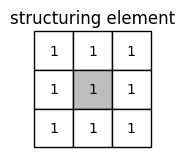

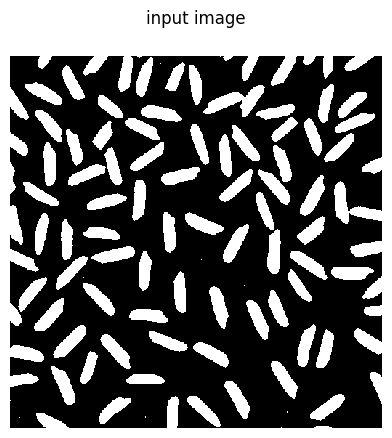

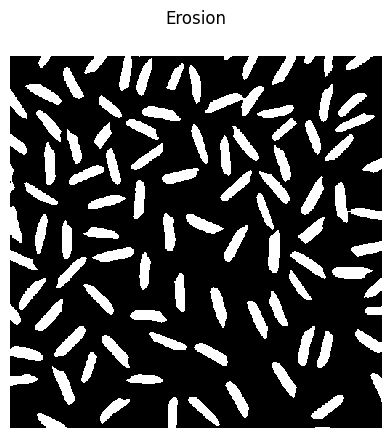

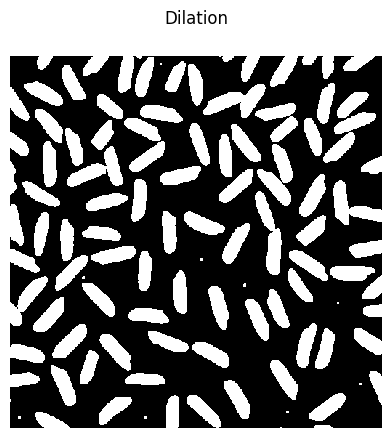

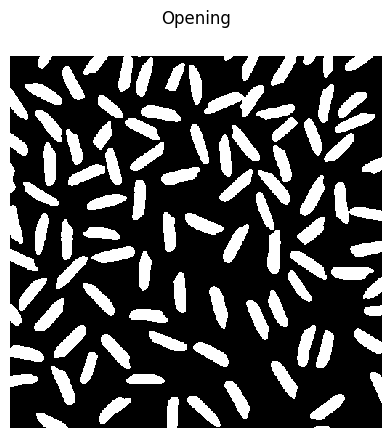

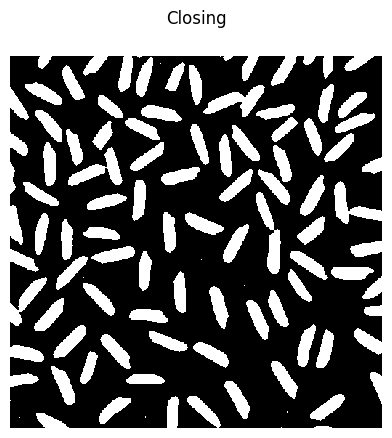

In [39]:
Outputs(img, structures[1])

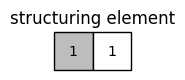

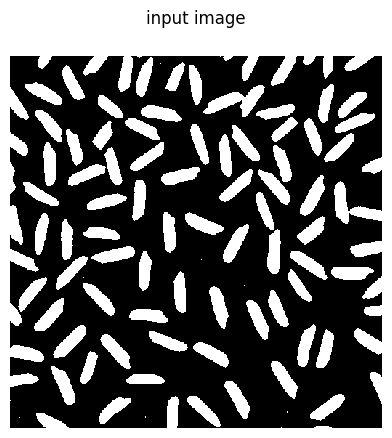

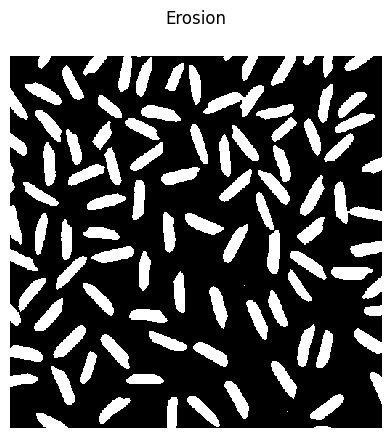

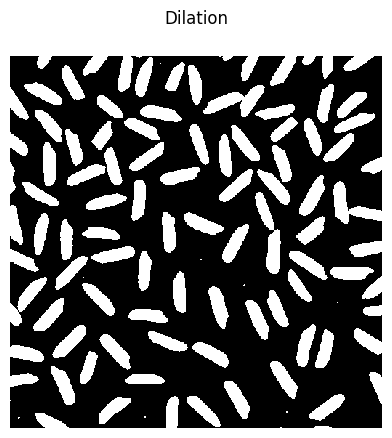

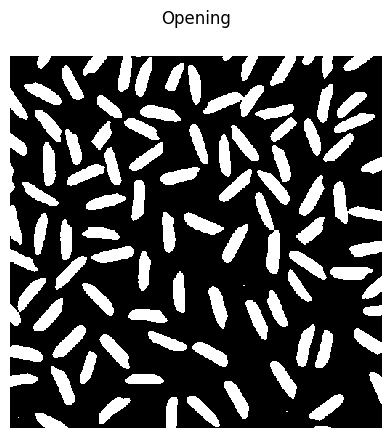

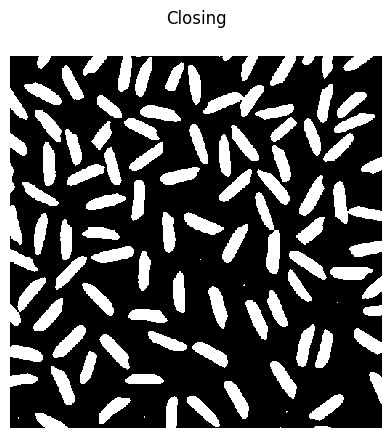

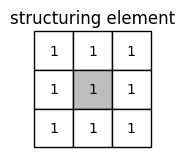

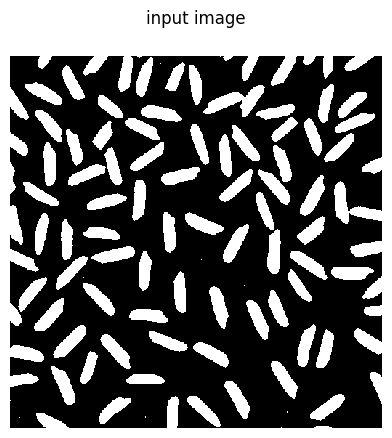

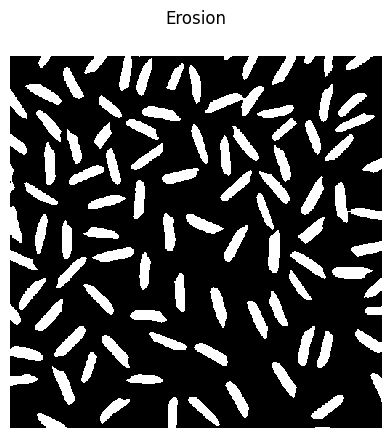

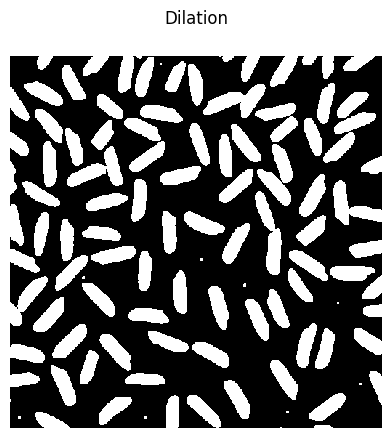

In [ ]:
for i, ele in enumerate(structures):
  Outputs(img, ele, "./Outputs/" + str(i) + "_")